# Tensorflow Intro

In [1]:
import tensorflow as tf

/Users/itrechyokas/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
hello = tf.constant('Hello world!')

In [3]:
sess = tf.Session()

result = sess.run(hello)
print(result)

sess.close()

b'Hello world!'


In [4]:
with tf.Session() as sess:
    result = sess.run(hello)
    print(result)

b'Hello world!'


In [5]:
a = tf.constant(2)
b = tf.constant(3)

c = tf.constant([1, 2, 3, 4])
d = tf.constant([2, 3, 4, 5])

In [6]:
with tf.Session() as sess:
    print('a = {}, b = {}, c = {}, d = {}\n'.format(
        sess.run(a), sess.run(b),
        sess.run(c), sess.run(d)
    ))

    print('a + b = {}\n'
          'a * b = {}'.format(sess.run(a + b), sess.run(a * b)))

    print('c + d = {}\n'
          'c * d = {}'.format(sess.run(c + d), sess.run(c * d)))

a = 2, b = 3, c = [1 2 3 4], d = [2 3 4 5]

a + b = 5
a * b = 6
c + d = [3 5 7 9]
c * d = [ 2  6 12 20]


In [7]:
a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)

In [8]:
add = tf.add(a, b)
mul = tf.multiply(a, b)

In [9]:
with tf.Session() as sess:
    writer = tf.summary.FileWriter('logs', sess.graph)
    # > tensorboard --logdir logs/

    print('a + b = {}'.format(sess.run(add, feed_dict={a: 3, b: 1})))
    print('a * b = {}'.format(sess.run(mul, feed_dict={a: 7, b: 8})))

a + b = 4
a * b = 56


In [10]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [11]:
from sklearn.datasets import make_regression

n_samples = 42

x_train, y_train = make_regression(
    n_samples=n_samples, n_features=1,
    noise=15, random_state=7
)
x_train = (x_train - x_train.mean()) / x_train.std()
y_train = (y_train - y_train.mean()) / y_train.std()

In [12]:
print(x_train[:5])

[[ 0.03264883]
 [ 2.00453732]
 [-0.09529635]
 [-0.29220736]
 [ 0.19354651]]


In [13]:
X = tf.placeholder('float')
Y = tf.placeholder('float')

W = tf.Variable(np.random.randn(), name='weight')
b = tf.Variable(np.random.randn(), name='bias')

In [14]:
prediction = tf.add(tf.multiply(X, W), b)

In [15]:
learning_rate = tf.placeholder(tf.float32, shape=[])

cost = tf.reduce_sum(tf.pow(prediction - Y, 2)) / n_samples
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [16]:
init = tf.global_variables_initializer()

In [17]:
epochs = 1000
sess = tf.Session()
sess.run(init)

lr = 0.1
for epoch in range(epochs):
    for (x_batch, y_batch) in zip(x_train, y_train):
        sess.run(optimizer, feed_dict={X: x_batch, Y: y_batch, learning_rate: lr})

    if epoch % 100 == 0:
        lr /= 2
        c = sess.run(cost, feed_dict={X: x_train, Y: y_train})
        print('Epoch #{}: cost = {}'.format(epoch, c))

Epoch #0: cost = 146.6855010986328
Epoch #100: cost = 67.63678741455078
Epoch #200: cost = 67.46207427978516
Epoch #300: cost = 67.38158416748047
Epoch #400: cost = 67.34589385986328
Epoch #500: cost = 67.32942962646484
Epoch #600: cost = 67.32154083251953
Epoch #700: cost = 67.31766510009766
Epoch #800: cost = 67.31455993652344
Epoch #900: cost = 67.31415557861328


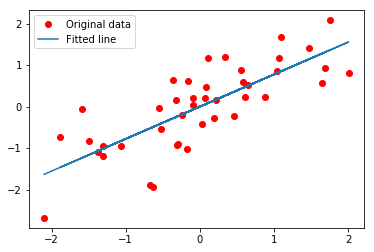

In [18]:
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, sess.run(W) * x_train + sess.run(b), label='Fitted line')
plt.legend()
plt.show()

In [19]:
sess.close()